In [ ]:
import numpy as np
import pandas as pd
import datetime as dt

import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib import ticker
from matplotlib.ticker import PercentFormatter
import matplotlib.patches as mpatches
from matplotlib.dates import DateFormatter
import matplotlib.dates as mdates

# Handle date time conversions between pandas and matplotlib
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
import matplotlib.colors as mcolors


plt.style.use('fivethirtyeight')

In [ ]:
xls = pd.ExcelFile('drive/My Drive/data_sales.xlsx')
df_transaction = pd.read_excel(xls, 'transaction')
df_customer = pd.read_excel(xls, 'customer')

In [ ]:
df_transaction.head()

,ID_TRANSAKSI,CUSTOMER_ID,ID_LINE_ITEM,ITEM_CODE,NAMA_ITEM,KATEGORI,QTY,HARGA,TOTAL,TANGGAL,DURASI_PERSIAPAN,METODE_PEMBAYARAN
0,2,C_4,1,2,LEMON TEA,MINUMAN,1,8000,8000,2020-11-02,3,CASH
1,2,C_4,2,8,COOKIES COCO,MAKANAN,2,3000,6000,2020-11-02,3,CASH
2,3,C_38,3,5,ES CENDOL,MINUMAN,1,10000,10000,2020-11-02,6,CASH
3,8,C_27,4,10,ROTI BUN,MAKANAN,2,3000,6000,2020-11-02,8,OVO
4,8,C_27,5,11,KUE LAPIS,MAKANAN,4,2500,10000,2020-11-02,8,OVO


In [ ]:
df_transaction[df_transaction.duplicated() != False]

,ID_TRANSAKSI,CUSTOMER_ID,ID_LINE_ITEM,ITEM_CODE,NAMA_ITEM,KATEGORI,QTY,HARGA,TOTAL,TANGGAL,DURASI_PERSIAPAN,METODE_PEMBAYARAN


In [ ]:
df_customer.head()

,CUSTOMER_ID,REGISTRATION_DATE,BORN_DATE,GENDER,REGION,SUBDISTRICT
0,C_911,2020-08-20,1995-05-31,M,South Jakarta,Setiabudi
1,C_430,2020-08-04,1997-04-06,F,South Jakarta,Cilandak
2,C_23,2020-05-27,1992-10-28,M,South Jakarta,Cilandak
3,C_90,2020-07-01,1994-12-22,F,South Jakarta,Pasar Minggu
4,C_819,2020-06-24,1984-10-11,F,South Jakarta,Cilandak


## GENERAL INFORMATION OF OUR DATA

In [ ]:
df_customer[df_customer.duplicated(subset='CUSTOMER_ID') != False]

,CUSTOMER_ID,REGISTRATION_DATE,BORN_DATE,GENDER,REGION,SUBDISTRICT


### Total Revenue

In [ ]:
total_revenue = df_transaction['TOTAL'].sum() 
print('Rp' + format(total_revenue, ',.2f'))

Rp44,634,500.00


### total order

In [ ]:
# df_cust_transaction['ID_TRANSAKSI'].count()

### Average Revenue per day

In [ ]:
average_revenue = df_transaction['TOTAL'].mean()
print('Rp' + format(int(average_revenue), ',.2f'))

Rp21,244.00


### how many transaction?


In [ ]:
df_transaction.shape[0]

2101

### how many customer do we have?


In [ ]:
df_customer.shape[0]

343

### how many customer make transaction in our store

In [ ]:
#merge dataset

df_cust_transaction = df_transaction.merge(df_customer, how='inner', on='CUSTOMER_ID')
df_cust_transaction.head()

,ID_TRANSAKSI,CUSTOMER_ID,ID_LINE_ITEM,ITEM_CODE,NAMA_ITEM,KATEGORI,QTY,HARGA,TOTAL,TANGGAL,DURASI_PERSIAPAN,METODE_PEMBAYARAN,REGISTRATION_DATE,BORN_DATE,GENDER,REGION,SUBDISTRICT
0,2,C_4,1,2,LEMON TEA,MINUMAN,1,8000,8000,2020-11-02,3,CASH,2020-06-15,2001-03-23,F,South Jakarta,Setiabudi
1,2,C_4,2,8,COOKIES COCO,MAKANAN,2,3000,6000,2020-11-02,3,CASH,2020-06-15,2001-03-23,F,South Jakarta,Setiabudi
2,597,C_4,1116,10,ROTI BUN,MAKANAN,2,3000,6000,2020-11-09,7,OVO,2020-06-15,2001-03-23,F,South Jakarta,Setiabudi
3,3,C_38,3,5,ES CENDOL,MINUMAN,1,10000,10000,2020-11-02,6,CASH,2020-08-02,1993-02-17,F,South Jakarta,Pasar Minggu
4,336,C_38,631,1,KOPI SUSU,MINUMAN,5,8000,40000,2020-11-06,11,CASH,2020-08-02,1993-02-17,F,South Jakarta,Pasar Minggu


In [ ]:
#count distinct customer_id on df_cust_transaction
len(df_cust_transaction['CUSTOMER_ID'].unique())

335

### how many customer who don't make transaction in our store

In [ ]:
len(df_customer['CUSTOMER_ID'].unique()) - len(df_cust_transaction['CUSTOMER_ID'].unique())

8

### list customer who doesn't make transaction in store

In [ ]:
df_customer_list = df_customer['CUSTOMER_ID'].unique()
df_cust_transaction_list = df_cust_transaction['CUSTOMER_ID'].unique()

df_cust_no_transaction = []

for cust in df_customer_list:
  if cust not in df_cust_transaction_list:
    df_cust_no_transaction.append(cust)

df_customer[df_customer['CUSTOMER_ID'].isin(df_cust_no_transaction) ]

,CUSTOMER_ID,REGISTRATION_DATE,BORN_DATE,GENDER,REGION,SUBDISTRICT
0,C_911,2020-08-20,1995-05-31,M,South Jakarta,Setiabudi
80,C_912,2020-08-01,1989-05-07,M,South Jakarta,Tebet
155,C_78,2020-08-16,1998-10-01,F,South Jakarta,Setiabudi
208,C_42,2020-09-16,2002-06-10,F,South Jakarta,Tebet
218,C_910,2020-10-20,1993-02-06,M,South Jakarta,Pasar Minggu
227,C_918,2020-10-27,1994-12-22,M,South Jakarta,Cilandak
246,C_906,2020-10-02,2000-01-13,M,South Jakarta,Tebet
281,C_917,2020-07-09,2000-01-13,M,South Jakarta,Cilandak


## OUR CUSTOMER PROFILE

In [ ]:
new_df_customer = df_customer[~ df_customer['CUSTOMER_ID'].isin(df_cust_no_transaction) ]

### which gender mostly buy product from our store?

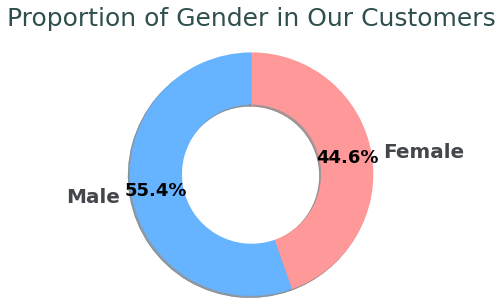

In [ ]:
proportion_gender = df_customer['GENDER'].value_counts(normalize=True) * 100
fig, ax = plt.subplots(facecolor='white')

patches, texts, autotexts = plt.pie(proportion_gender,
                                    labels=['Male', 'Female'],
                                    labeldistance=1.1,
                                    shadow=True,
                                    colors=['#66b3ff','#ff9999'],
                                    autopct='%1.1f%%',
                                    textprops={
                                        'fontsize': 18,
                                        'fontweight': 'bold'
                                    },wedgeprops=dict(width=0.6),
                                     startangle=90,
                                    pctdistance=0.80,
                                    radius=1.4)

texts[0].set_fontsize(20)
texts[1].set_fontsize(20)
for text in texts:
    text.set_color('#43464b')
    
plt.title("Proportion of Gender in Our Customers",
          pad=40,
          size=25,
          x=.5,
          color='darkslategray',
          fontname='sans-serif')

plt.show()

### where customer came from

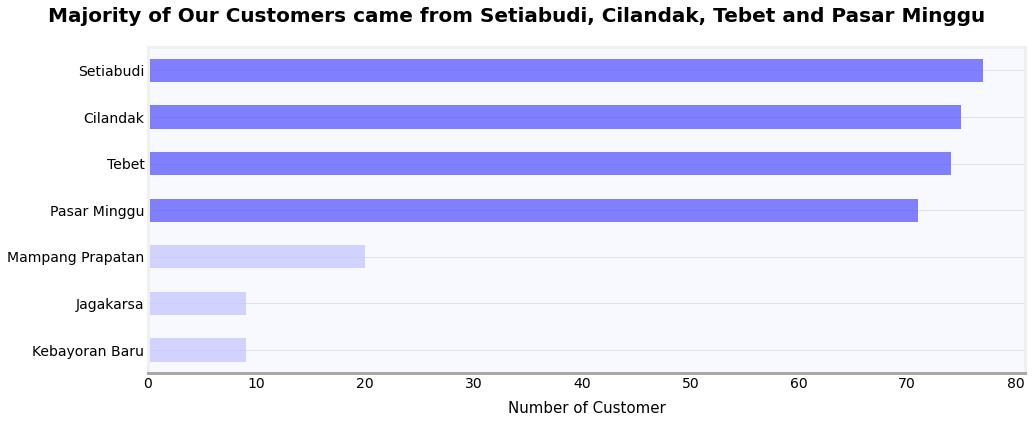

In [ ]:
fig, ax = plt.subplots(facecolor='white')
ax.set_facecolor("ghostwhite")

color = [
    '#4d4dff' if int(i) > 40 else '#c3c3ff'
    for i in new_df_customer['SUBDISTRICT'].value_counts().sort_values().values]


new_df_customer['SUBDISTRICT'].value_counts().sort_values().plot.barh(figsize=(14,6),
                                                                      color= color,
                                                                      alpha=.7)

ax.tick_params(axis='both', left=False, bottom=False, labelsize='14')
ax.spines['bottom'].set_color('darkgray')
plt.grid(False, axis='x')
plt.grid(axis='y',alpha=.5)
plt.ylabel('', labelpad=15, fontsize=20)
plt.xlabel('Number of Customer',labelpad=10,size=15)


plt.title("Majority of Our Customers came from Setiabudi, Cilandak, Tebet and Pasar Minggu",
          fontsize=20,
          x=.42,
          fontweight='semibold',
          pad=25)

plt.show()

### how about distribution of our customers age

In [ ]:
# def get_usia(tanggal_beli, tanggal_lahir):
#   bulan_hari_beli = '-'.join(tanggal_beli.split('-')[1:])
#   bulan_hari_lahir = '-'.join(tanggal_lahir.split('-')[1:])

#   bulan_beli = dt.datetime.strptime(bulan_hari_beli,"%m-%d")
#   bulan_lahir = dt.datetime.strptime(bulan_hari_lahir,"%m-%d")

#   tahun_beli = int(tanggal_beli.split('-')[0])
#   tahun_lahir = int(tanggal_lahir.split('-')[0])

#   if bulan_beli > bulan_lahir:
#     return tahun_beli - tahun_lahir
#   else:
#     return (tahun_beli-1) - tahun_lahir

In [ ]:
def get_usia(tanggal_beli, tanggal_lahir):
  bulan_hari_beli = '{}-{}'.format(tanggal_beli.month, tanggal_beli.day)
  bulan_hari_lahir = '{}-{}'.format(tanggal_lahir.month, tanggal_lahir.day)

  bulan_beli = dt.datetime.strptime(bulan_hari_beli,"%m-%d")
  bulan_lahir = dt.datetime.strptime(bulan_hari_lahir,"%m-%d")

  if bulan_beli > bulan_lahir:
    return tanggal_beli.year - tanggal_lahir.year
  else:
    return (tanggal_beli.year - 1) - tanggal_lahir.year

In [ ]:
df_cust_transaction['USIA'] = df_cust_transaction.apply(lambda x: get_usia(x['TANGGAL'], x['BORN_DATE']), axis=1)
df_cust_transaction.head()

,ID_TRANSAKSI,CUSTOMER_ID,ID_LINE_ITEM,ITEM_CODE,NAMA_ITEM,KATEGORI,QTY,HARGA,TOTAL,TANGGAL,DURASI_PERSIAPAN,METODE_PEMBAYARAN,REGISTRATION_DATE,BORN_DATE,GENDER,REGION,SUBDISTRICT,USIA
0,2,C_4,1,2,LEMON TEA,MINUMAN,1,8000,8000,2020-11-02,3,CASH,2020-06-15,2001-03-23,F,South Jakarta,Setiabudi,19
1,2,C_4,2,8,COOKIES COCO,MAKANAN,2,3000,6000,2020-11-02,3,CASH,2020-06-15,2001-03-23,F,South Jakarta,Setiabudi,19
2,597,C_4,1116,10,ROTI BUN,MAKANAN,2,3000,6000,2020-11-09,7,OVO,2020-06-15,2001-03-23,F,South Jakarta,Setiabudi,19
3,3,C_38,3,5,ES CENDOL,MINUMAN,1,10000,10000,2020-11-02,6,CASH,2020-08-02,1993-02-17,F,South Jakarta,Pasar Minggu,27
4,336,C_38,631,1,KOPI SUSU,MINUMAN,5,8000,40000,2020-11-06,11,CASH,2020-08-02,1993-02-17,F,South Jakarta,Pasar Minggu,27


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


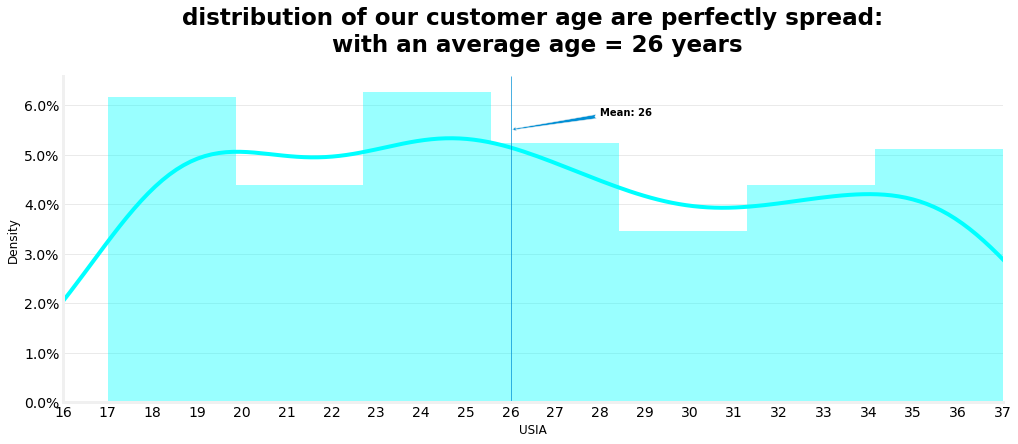

In [ ]:
df_usia = df_cust_transaction.sort_values('TANGGAL').drop_duplicates('CUSTOMER_ID', keep='last')

fig, ax = plt.subplots(figsize=(15,6), facecolor='white')
sns.distplot(df_usia['USIA'], color='cyan')
plt.axvline(int(df_usia['USIA'].mean()), alpha=.7, linewidth=1)
ax.set_facecolor("white")

def mjrFormatter(x, pos):
    return "{:.1f}%".format(x * 100)

plt.grid(False, axis='x')
plt.grid(axis='y',alpha=.4)
plt.xlim(16, df_usia['USIA'].max())
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax.tick_params(labelsize=14)
ax.yaxis.set_major_formatter(ticker.FuncFormatter(mjrFormatter))

plt.annotate("Mean: " + str(int(df_usia['USIA'].mean())),
             xy=(int(df_usia['USIA'].mean()), 0.055),
             xytext=(28, 0.058),fontweight='bold',
             arrowprops=dict(arrowstyle="fancy"))
sns.despine()

plt.title(
    'distribution of our customer age are perfectly spread:\n with an average age = 26 years',
    fontsize=23,
    pad=25,
    ha='center',
    fontweight='semibold')

plt.show()


In [ ]:
df_cust_transaction.head()

,ID_TRANSAKSI,CUSTOMER_ID,ID_LINE_ITEM,ITEM_CODE,NAMA_ITEM,KATEGORI,QTY,HARGA,TOTAL,TANGGAL,DURASI_PERSIAPAN,METODE_PEMBAYARAN,REGISTRATION_DATE,BORN_DATE,GENDER,REGION,SUBDISTRICT,USIA
0,2,C_4,1,2,LEMON TEA,MINUMAN,1,8000,8000,2020-11-02,3,CASH,2020-06-15,2001-03-23,F,South Jakarta,Setiabudi,19
1,2,C_4,2,8,COOKIES COCO,MAKANAN,2,3000,6000,2020-11-02,3,CASH,2020-06-15,2001-03-23,F,South Jakarta,Setiabudi,19
2,597,C_4,1116,10,ROTI BUN,MAKANAN,2,3000,6000,2020-11-09,7,OVO,2020-06-15,2001-03-23,F,South Jakarta,Setiabudi,19
3,3,C_38,3,5,ES CENDOL,MINUMAN,1,10000,10000,2020-11-02,6,CASH,2020-08-02,1993-02-17,F,South Jakarta,Pasar Minggu,27
4,336,C_38,631,1,KOPI SUSU,MINUMAN,5,8000,40000,2020-11-06,11,CASH,2020-08-02,1993-02-17,F,South Jakarta,Pasar Minggu,27


### Most Favorite Product by Customers

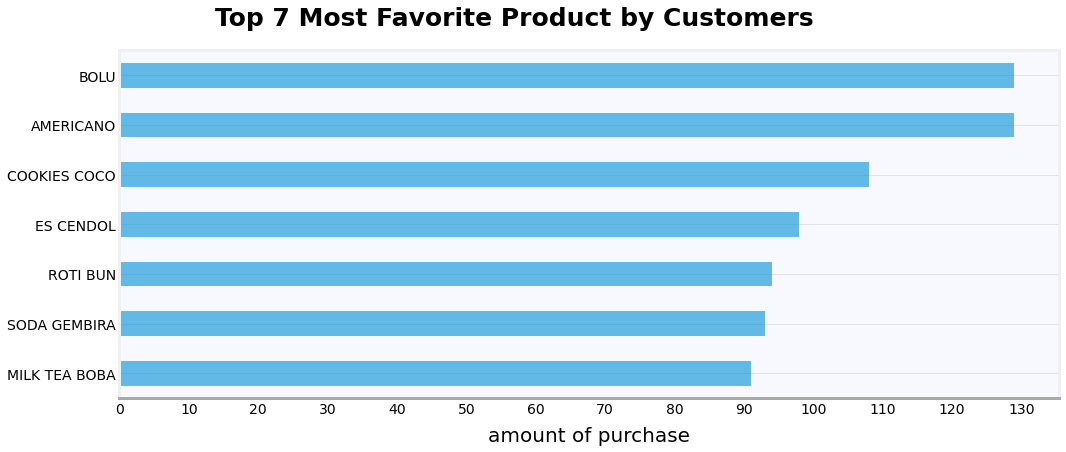

In [ ]:
df_product = df_cust_transaction.sort_values('TANGGAL').drop_duplicates('CUSTOMER_ID', keep='last')

df_product = df_product.groupby('NAMA_ITEM').sum().sort_values('QTY')
df_product['percent'] = df_product['QTY'] / 2101
 
fig, ax = plt.subplots(facecolor='white')
ax.set_facecolor("ghostwhite")

df_product['QTY'].tail(7).plot.barh(figsize=(15,6.4),
                            rot=0,
                            alpha=.6)


ax.xaxis.set_major_locator(ticker.MultipleLocator(10))
ax.tick_params(axis='both', left=False, bottom=False, labelsize='14')

ax.spines['bottom'].set_color('darkgray')
plt.grid(False, axis='x')
plt.grid(axis='y',alpha=.5)
plt.ylabel('', labelpad=15, fontsize=20)
plt.xlabel('amount of purchase', labelpad=10, size=20)
plt.title("Top 7 Most Favorite Product by Customers",
          fontsize=25,
          x=.42,
          fontweight='semibold',
          pad=25)

plt.show()


In [ ]:
df_product

,ID_TRANSAKSI,ID_LINE_ITEM,ITEM_CODE,QTY,HARGA,TOTAL,DURASI_PERSIAPAN,USIA,percent
NAMA_ITEM,,,,,,,,,
COOKIES BANANA,15020,28727,180,61,60000,183000,131,564,0.029034
KOPI SUSU,19716,37822,29,71,232000,568000,148,776,0.033793
KUE LAPIS,17419,33266,253,73,57500,182500,123,611,0.034745
LEMON TEA,20363,39246,50,87,200000,696000,131,603,0.041409
THAI TEA,21060,40620,196,88,280000,880000,148,727,0.041885
MILK TEA BOBA,19699,37437,81,91,270000,910000,148,730,0.043313
SODA GEMBIRA,21583,41979,156,93,312000,1116000,152,668,0.044265
ROTI BUN,19571,37830,270,94,81000,282000,158,715,0.044741
ES CENDOL,22103,42614,140,98,280000,980000,166,764,0.046644


### most Favorite type of payment by Customers

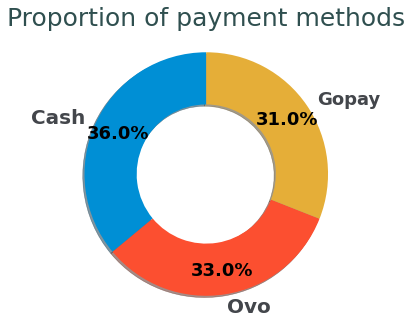

In [ ]:
df_payment = df_cust_transaction['METODE_PEMBAYARAN'].value_counts(normalize=True)

fig, ax = plt.subplots(facecolor='white')

patches, texts, autotexts = plt.pie(df_payment,
                                    labels=['Cash', 'Ovo', 'Gopay'],
                                    labeldistance=1.1,
                                    shadow=True,
                                    autopct='%1.1f%%',
                                    textprops={
                                        'fontsize': 18,
                                        'fontweight': 'bold'
                                    },wedgeprops=dict(width=0.6),
                                     startangle=90,
                                    pctdistance=0.80,
                                    radius=1.4)

texts[0].set_fontsize(20)
texts[1].set_fontsize(20)
for text in texts:
    text.set_color('#43464b')
    
plt.title("Proportion of payment methods",
          pad=40,
          size=25,
          x=.5,
          color='darkslategray',
          fontname='sans-serif')

plt.show()

## OUR PRODUCT PEFORMANCE

### Total Daily Revenue

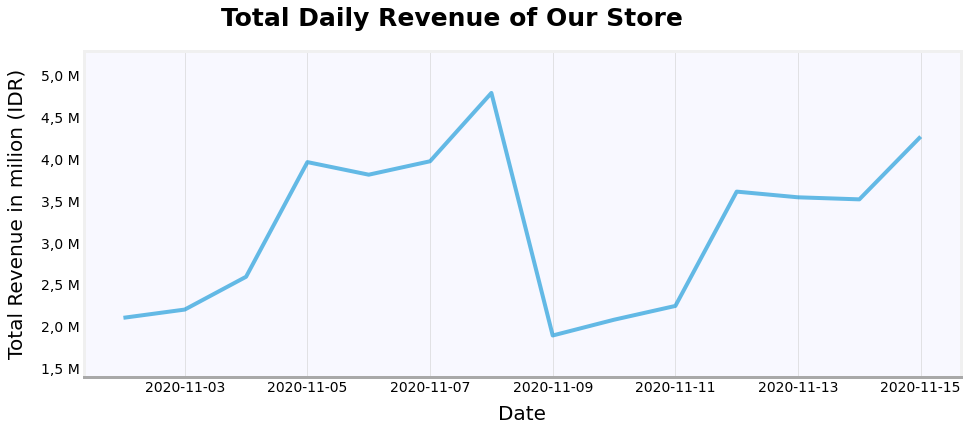

In [ ]:
daily_total_revenue = df_cust_transaction.groupby('TANGGAL').sum()

fig, ax = plt.subplots(figsize=(14,6), facecolor='white')
ax.set_facecolor("ghostwhite")

ax.plot(daily_total_revenue.index.values,
       daily_total_revenue['TOTAL'],
       alpha=.6)

def mjrFormatter(x, pos):
    new = '' + format(x, ',.1f')
    return '{} M'.format(new[:3])

ax.yaxis.set_major_formatter(ticker.FuncFormatter(mjrFormatter))
ax.tick_params(axis='both', left=False, bottom=False, labelsize='14')

ax.spines['bottom'].set_color('darkgray')
plt.grid(False, axis='y')
plt.grid(axis='x',alpha=.5)

plt.ylim(daily_total_revenue['TOTAL'].min() - 500000,daily_total_revenue['TOTAL'].max()+ 500000)

plt.ylabel('Total Revenue in milion (IDR)', labelpad=15, fontsize=20)
plt.xlabel('Date', labelpad=10, size=20)
plt.title("Total Daily Revenue of Our Store",
          fontsize=25,
          x=.42,
          fontweight='semibold',
          pad=25)

plt.show()

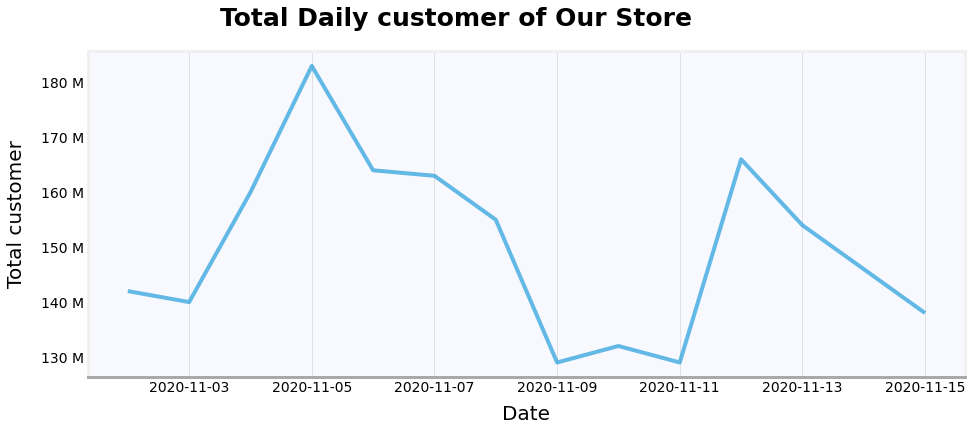

In [ ]:
daily_total_revenue = df_cust_transaction.groupby('TANGGAL').count()

fig, ax = plt.subplots(figsize=(14,6), facecolor='white')
ax.set_facecolor("ghostwhite")

ax.plot(daily_total_revenue.index.values,
       daily_total_revenue['TOTAL'],
       alpha=.6)

def mjrFormatter(x, pos):
    new = '' + format(x, ',.1f')
    return '{} M'.format(new[:3])

ax.yaxis.set_major_formatter(ticker.FuncFormatter(mjrFormatter))
ax.tick_params(axis='both', left=False, bottom=False, labelsize='14')

ax.spines['bottom'].set_color('darkgray')
plt.grid(False, axis='y')
plt.grid(axis='x',alpha=.5)

# plt.ylim(daily_total_revenue['TOTAL'].min() - 500000,daily_total_revenue['TOTAL'].max()+ 500000)

plt.ylabel('Total customer', labelpad=15, fontsize=20)
plt.xlabel('Date', labelpad=10, size=20)
plt.title("Total Daily customer of Our Store",
          fontsize=25,
          x=.42,
          fontweight='semibold',
          pad=25)

plt.show()

### total revenue per product

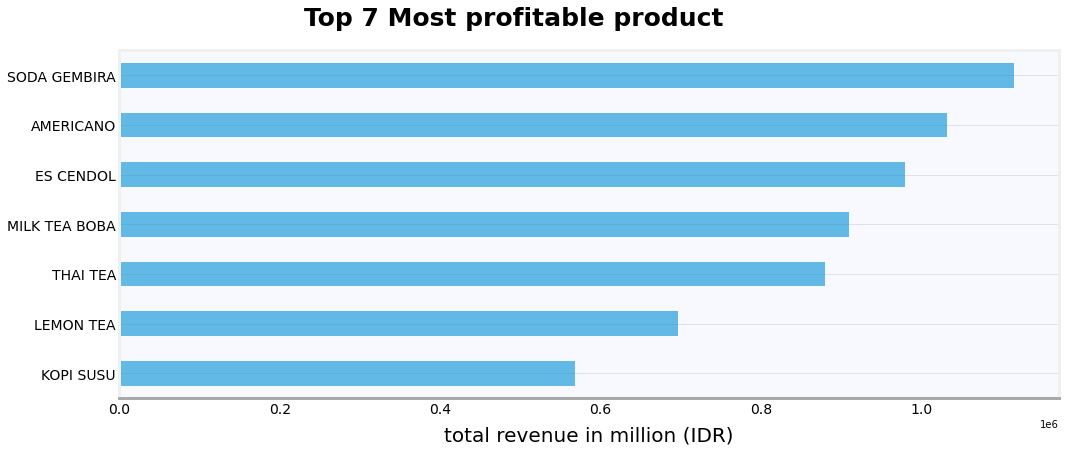

In [ ]:
df_rev_product = df_product.groupby('NAMA_ITEM').sum().sort_values('TOTAL')
df_rev_product['percent'] = df_rev_product['TOTAL'] / total_revenue

fig, ax = plt.subplots(facecolor='white')
ax.set_facecolor("ghostwhite")

df_rev_product['TOTAL'].tail(7).plot.barh(figsize=(15,6.4),
                            rot=0,
                            alpha=.6)



ax.tick_params(axis='both', left=False, bottom=False, labelsize='14')

ax.spines['bottom'].set_color('darkgray')
plt.grid(False, axis='x')
plt.grid(axis='y',alpha=.5)
plt.ylabel('', labelpad=15, fontsize=20)
plt.xlabel('total revenue in million (IDR)', labelpad=10, size=20)
plt.title("Top 7 Most profitable product",
          fontsize=25,
          x=.42,
          fontweight='semibold',
          pad=25)

plt.show()


In [ ]:
df_rev_product

,ID_TRANSAKSI,ID_LINE_ITEM,ITEM_CODE,QTY,HARGA,TOTAL,DURASI_PERSIAPAN,USIA,percent
NAMA_ITEM,,,,,,,,,
KUE LAPIS,17419,33266,253,73,57500,182500,123,611,0.004089
COOKIES BANANA,15020,28727,180,61,60000,183000,131,564,0.004100
ROTI BUN,19571,37830,270,94,81000,282000,158,715,0.006318
BOLU,27365,52080,480,129,100000,322500,224,1065,0.007225
COOKIES COCO,19882,37588,240,108,90000,324000,161,804,0.007259
KOPI SUSU,19716,37822,29,71,232000,568000,148,776,0.012726
LEMON TEA,20363,39246,50,87,200000,696000,131,603,0.015593
THAI TEA,21060,40620,196,88,280000,880000,148,727,0.019716
MILK TEA BOBA,19699,37437,81,91,270000,910000,148,730,0.020388


### Daily Average Revenue per Order

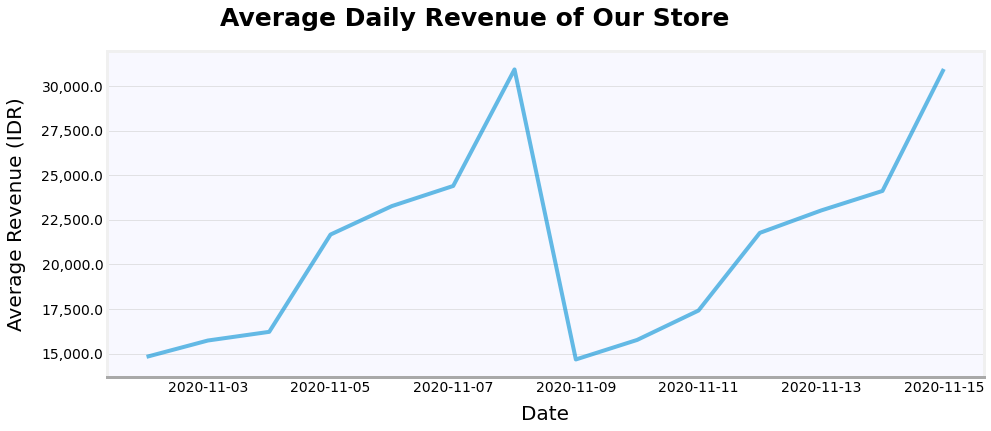

In [ ]:
daily_total_revenue = df_cust_transaction.groupby('TANGGAL').mean()

fig, ax = plt.subplots(figsize=(14,6), facecolor='white')
ax.set_facecolor("ghostwhite")

ax.plot(daily_total_revenue.index.values,
       daily_total_revenue['TOTAL'],
       alpha=.6)

def mjrFormatter(x, pos):
    new = '' + format(x, ',.1f')
    return new

ax.yaxis.set_major_formatter(ticker.FuncFormatter(mjrFormatter))
ax.tick_params(axis='both', left=False, bottom=False, labelsize='14')

ax.spines['bottom'].set_color('darkgray')
plt.grid(False, axis='x')
plt.grid(axis='y',alpha=.5)

plt.ylim(daily_total_revenue['TOTAL'].min() - 1000,daily_total_revenue['TOTAL'].max()+1000)

plt.ylabel('Average Revenue (IDR)', labelpad=15, fontsize=20)
plt.xlabel('Date', labelpad=10, size=20)
plt.title("Average Daily Revenue of Our Store",
          fontsize=25,
          x=.42,
          fontweight='semibold',
          pad=25)

plt.show()

### New Customer Ratio

In [ ]:
df_min_purchase = df_cust_transaction.groupby('CUSTOMER_ID').min()['TANGGAL'].reset_index()
df_min_purchase.columns = ['CUSTOMER_ID','MinPurchaseDate']

df_cust_transaction = pd.merge(df_cust_transaction, df_min_purchase, on='CUSTOMER_ID')

df_cust_transaction['UserType'] = 'New'
df_cust_transaction.loc[df_cust_transaction['TANGGAL']>df_cust_transaction['MinPurchaseDate'],'UserType'] = 'Existing'


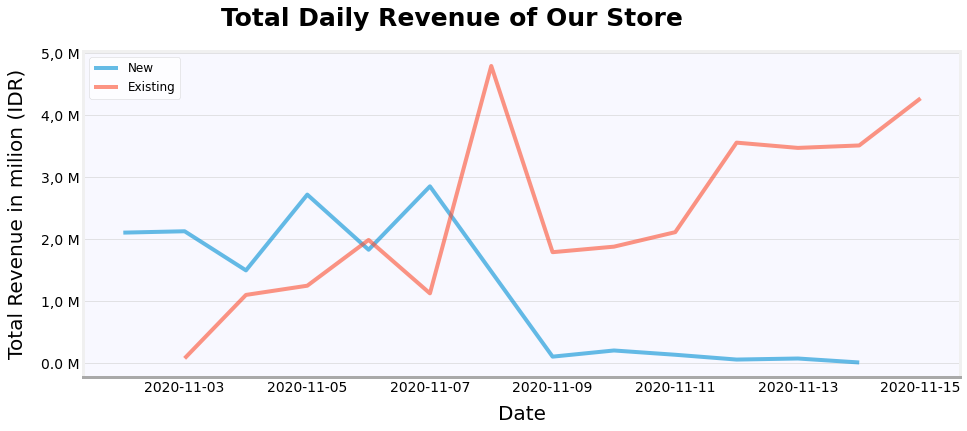

In [ ]:
#calculate revenue
asd = df_cust_transaction.groupby(['TANGGAL','UserType'])['TOTAL'].sum().reset_index()


fig, ax = plt.subplots(figsize=(14,6), facecolor='white')
ax.set_facecolor("ghostwhite")

new, = ax.plot(asd[asd['UserType'] == 'New']['TANGGAL'],
                   asd[asd['UserType'] == 'New']['TOTAL'],
                   alpha=.6)

existing, = ax.plot(asd[asd['UserType'] == 'Existing']['TANGGAL'],
                     asd[asd['UserType'] == 'Existing']['TOTAL'],
                     alpha=.6)


def mjrFormatter(x, pos):
    new = '' + format(x, ',.1f')
    return '{} M'.format(new[:3])

ax.yaxis.set_major_formatter(ticker.FuncFormatter(mjrFormatter))
ax.tick_params(axis='both', left=False, bottom=False, labelsize='14')

ax.spines['bottom'].set_color('darkgray')
plt.grid(False, axis='x')
plt.grid(axis='y',alpha=.5)

# plt.ylim(daily_total_revenue['TOTAL'].min() - 500000,daily_total_revenue['TOTAL'].max()+ 500000)

plt.ylabel('Total Revenue in milion (IDR)', labelpad=15, fontsize=20)
plt.xlabel('Date', labelpad=10, size=20)
plt.title("Total Daily Revenue of Our Store",
          fontsize=25,
          x=.42,
          fontweight='semibold',
          pad=25)

plt.legend([new, existing], ['New', 'Existing'],
           facecolor='white',
           fancybox=True, 
           loc='best',
           fontsize='large')

plt.show()

In [ ]:
df_cust_transaction.query("UserType == 'New'").groupby(['TANGGAL'])['CUSTOMER_ID'].nunique()

TANGGAL
2020-11-02    58
2020-11-03    70
2020-11-04    45
2020-11-05    48
2020-11-06    39
2020-11-07    57
2020-11-09     4
2020-11-10     5
2020-11-11     3
2020-11-12     3
2020-11-13     2
2020-11-14     1
Name: CUSTOMER_ID, dtype: int64

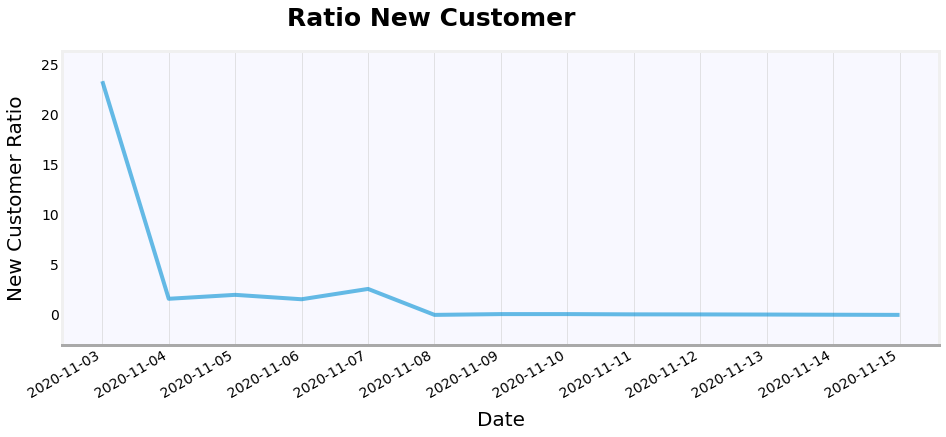

In [ ]:
df_user_ratio = df_cust_transaction.query("UserType == 'New'").groupby(['TANGGAL'])['CUSTOMER_ID'].nunique()/df_cust_transaction.query("UserType == 'Existing'").groupby(['TANGGAL'])['CUSTOMER_ID'].nunique()
df_user_ratio = df_user_ratio.reset_index()
df_user_ratio['TANGGAL'] = df_user_ratio['TANGGAL'].apply(lambda x: str(x)[:10])
df_user_ratio.iloc[6,1] = 0
df_user_ratio.iloc[-1,1] = 0
df_user_ratio = df_user_ratio.dropna()

#plot
fig, ax = plt.subplots(figsize=(14,6), facecolor='white')
ax.set_facecolor("ghostwhite")

ax.plot(df_user_ratio['TANGGAL'],
        df_user_ratio['CUSTOMER_ID'],
        alpha=.6)
fig.autofmt_xdate()

ax.tick_params(axis='both', left=False, bottom=False, labelsize='14')

ax.spines['bottom'].set_color('darkgray')
plt.grid(False, axis='y')
plt.grid(axis='x',alpha=.5)

plt.ylim(df_user_ratio['CUSTOMER_ID'].min() - 3,df_user_ratio['CUSTOMER_ID'].max()+ 3)

plt.ylabel('New Customer Ratio', labelpad=15, fontsize=20)
plt.xlabel('Date', labelpad=10, size=20)
plt.title("Ratio New Customer",
          fontsize=25,
          x=.42,
          fontweight='semibold',
          pad=25)

plt.show()

In [ ]:
df_new = df_cust_transaction[df_cust_transaction['UserType'] == 'New'].drop_duplicates(subset='CUSTOMER_ID')
df_new.groupby('TANGGAL').count()['CUSTOMER_ID'].median()

22.0

### Daily Retentions Customers

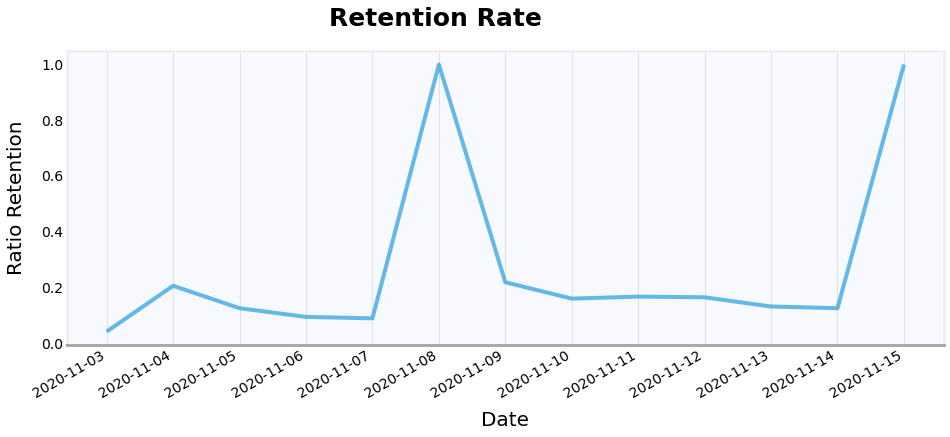

In [ ]:
df_user_purchase = df_cust_transaction.groupby(['CUSTOMER_ID','TANGGAL'])['TOTAL'].sum().reset_index()
df_user_purchase['TANGGAL'] = df_user_purchase['TANGGAL'].astype(str)

#create retention matrix with crosstab
df_retention = pd.crosstab(df_user_purchase['CUSTOMER_ID'], df_user_purchase['TANGGAL']).reset_index()

date_columns = df_retention.columns[1:]
retention_list = []

for i in range(len(date_columns)-1):
  retention_data = {}
  select_month = date_columns[i+1]
  prev_month = date_columns[i]

  retention_data['TANGGAL'] = select_month
  retention_data['Total_User'] = df_retention[select_month].sum()
  retention_data['Retained_User'] = df_retention[(df_retention[select_month]>0) & (df_retention[prev_month]>0)][select_month].sum()

  retention_list.append(retention_data)


retention = pd.DataFrame(retention_list)
retention['Ratio_Retention'] = retention['Retained_User']/retention['Total_User']


#plot
fig, ax = plt.subplots(figsize=(14,6), facecolor='white')
ax.set_facecolor("ghostwhite")

ax.plot(retention['TANGGAL'],
        retention['Ratio_Retention'],
        alpha=.6)
fig.autofmt_xdate()

ax.tick_params(axis='both', left=False, bottom=False, labelsize='14')

ax.spines['bottom'].set_color('darkgray')
plt.grid(False, axis='y')
plt.grid(axis='x',alpha=.5)

# plt.ylim(daily_total_revenue['TOTAL'].min() - 500000,daily_total_revenue['TOTAL'].max()+ 500000)

plt.ylabel('Ratio Retention', labelpad=15, fontsize=20)
plt.xlabel('Date', labelpad=10, size=20)
plt.title("Retention Rate",
          fontsize=25,
          x=.42,
          fontweight='semibold',
          pad=25)

plt.show()


### Retention Cohort Analysis

In [ ]:
# new_df_retention = pd.crosstab(df_user_purchase['CUSTOMER_ID'], df_user_purchase['TANGGAL']).reset_index()
# new_df_retention = pd.merge(df_retention, df_min_purchase[['CUSTOMER_ID', 'MinPurchaseDate']], on='CUSTOMER_ID')

# new_column_names = [ 'm_' + str(column) for column in new_df_retention.columns[:-1]]
# new_column_names.append('min_purchase_date')
# new_df_retention.columns = new_column_names

# new_list_retention = []

# for i in range(len(date_columns)):
#   retention_data = {}
#   select_date = date_columns[i]
#   prev_dates = date_columns[:i]
#   next_dates = date_columns[i+1:]

#   for prev_date in prev_dates:
#     retention_data[prev_date] = np.nan

#   total_user = new_df_retention[new_df_retention['min_purchase_date'] == select_date]['min_purchase_date'].count()
#   retention_data['total_user'] = total_user
#   retention_data[select_date] = 1

#   df_select_date = new_df_retention.loc[new_df_retention['min_purchase_date'] == select_date]

#   for next_date in next_dates:
#     new_query = "m_{}".format(str(next_date))
#     retention_data[next_date] = df_select_date[df_select_date[new_query] > 0][new_query].sum()
    
#     # if retention_data[next_date] == 0:
#     #   retention_data[next_date] = 0
#     # else:
#     #   retention_data[next_date] = np.round(retention_data[next_date] / total_user,2)

#   new_list_retention.append(retention_data)
  


# new_retention = pd.DataFrame(new_list_retention)
# new_retention.index = date_columns
# new_retention

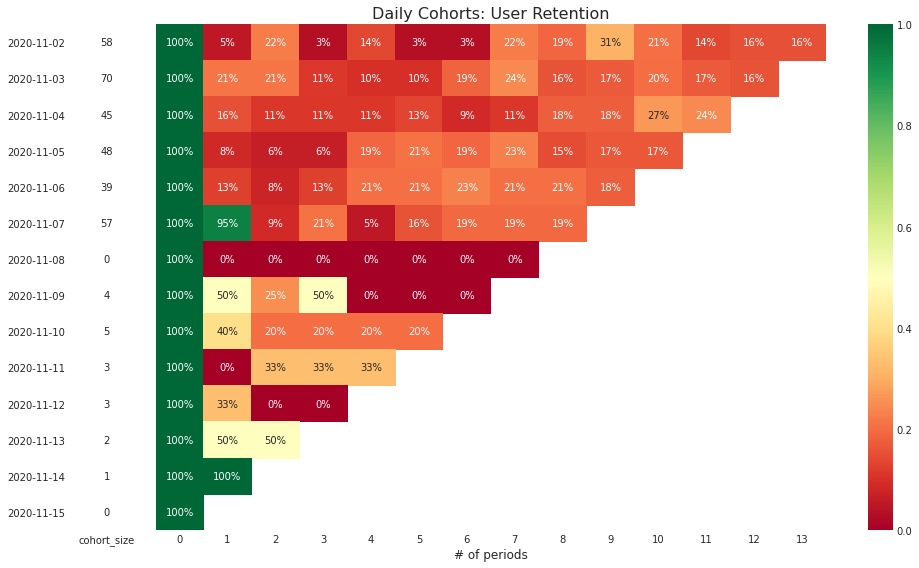

In [ ]:
df_f_cohort = df_cust_transaction[['ID_TRANSAKSI', 'CUSTOMER_ID', 'TANGGAL']].drop_duplicates()
df_f_cohort['cohort'] = df_f_cohort.groupby('CUSTOMER_ID')['TANGGAL'].transform('min')
df_f_cohort = df_f_cohort.groupby(['cohort', 'TANGGAL']).agg(n_customers=('CUSTOMER_ID', 'nunique')).reset_index(drop=False)
df_f_cohort['period_number'] = (df_f_cohort['TANGGAL'] - df_f_cohort['cohort']).dt.days


cohort_pivot = df_f_cohort.pivot_table(index = 'cohort', columns = 'period_number', values = 'n_customers')
sdf = [str(x.strftime('%Y-%m-%d')) for x in cohort_pivot.index]
cohort_pivot.index = sdf
cohort_size = cohort_pivot.iloc[:,0]
retention_matrix = cohort_pivot.divide(cohort_size, axis = 0)

#insert missing row
retention_matrix.loc['2020-11-08',0:7] = 0
retention_matrix.loc['2020-11-15',0] = 1
retention_matrix.iloc[-2,0] = 1
retention_matrix = retention_matrix.sort_index()

#insert missing column
retention_matrix.iloc[7,4:7] = 0
retention_matrix.iloc[9,1] = 0
retention_matrix.iloc[10,2:4] = 0
retention_matrix


#cohort_size
new_cohort_size = cohort_size.copy()
new_cohort_size['2020-11-08'] = 0
new_cohort_size['2020-11-15'] = 0
new_cohort_size = new_cohort_size.sort_index()


# plot the retention matrix
with sns.axes_style("white"):
    fig, ax = plt.subplots(1, 2, figsize=(14, 8), sharey=True, gridspec_kw={'width_ratios': [1, 11]})
    
    # retention matrix
    sns.heatmap(retention_matrix, 
                mask=retention_matrix.isnull(), 
                annot=True, 
                fmt='.0%', 
                cmap='RdYlGn', 
                ax=ax[1])
    ax[1].set_title('Daily Cohorts: User Retention', fontsize=16)
    ax[1].set(xlabel='# of periods',
              ylabel='')
    

    # cohort size
    cohort_size_df = pd.DataFrame(new_cohort_size).rename(columns={0: 'cohort_size'})
    white_cmap = mcolors.ListedColormap(['white'])
    sns.heatmap(cohort_size_df, 
                annot=True, 
                cbar=False, 
                fmt='g', 
                cmap=white_cmap, 
                ax=ax[0])


    fig.tight_layout()